In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [6]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
distance_from_home_dict = dict(df.DistanceFromHome.value_counts())
distance_from_home_dict

{2: 211,
 1: 208,
 10: 86,
 9: 85,
 3: 84,
 7: 84,
 8: 80,
 5: 65,
 4: 64,
 6: 59,
 16: 32,
 11: 29,
 24: 28,
 29: 27,
 23: 27,
 18: 26,
 15: 26,
 20: 25,
 25: 25,
 26: 25,
 28: 23,
 19: 22,
 14: 21,
 12: 20,
 17: 20,
 13: 19,
 22: 19,
 21: 18,
 27: 12}

In [8]:
years_at_company_dict = dict(df.YearsAtCompany.value_counts())
years_at_company_dict

{5: 196,
 1: 171,
 3: 128,
 2: 127,
 10: 120,
 4: 110,
 7: 90,
 9: 82,
 8: 80,
 6: 76,
 0: 44,
 11: 32,
 20: 27,
 13: 24,
 15: 20,
 14: 18,
 22: 15,
 12: 14,
 21: 14,
 18: 13,
 16: 12,
 19: 11,
 17: 9,
 24: 6,
 33: 5,
 25: 4,
 26: 4,
 31: 3,
 32: 3,
 36: 2,
 27: 2,
 29: 2,
 23: 2,
 30: 1,
 34: 1,
 37: 1,
 40: 1}

In [9]:
gender = dict(df.Gender.value_counts())
gender

{'Male': 882, 'Female': 588}

In [35]:
def plot_distance(d: int, gender: str, years_at_company: int):
    
    job_dict = dict(df[(df['Gender'] == gender) & (df['YearsAtCompany'] == years_at_company)]['DistanceFromHome'].describe())   
    df1 = df[(df['Gender'] == gender) & (df['YearsAtCompany'] == years_at_company)]  
    distance_col = df1['DistanceFromHome']
    
#     Jaki % pracownikow z podziałem na płeć ma dystans do pracy mniej/wiecej biorąc pod uwagę przepracowane lata w firmie.
    
    employees = job_dict['count']
    less = df1[(distance_col < d)]['DistanceFromHome'].count()
    more = df1[(distance_col > d)]['DistanceFromHome'].count()
    less_p = round(100 * less / employees, 2)
    more_p = round(100 * more / employees, 2)
    
    variation = st.variation(df1['DistanceFromHome'])
    
#     wykres jak wypadasz w kwartylu, w ktorym miesci sie dany dystans do pracy
    
    if variation > 0.15 and job_dict['count'] >= 24:
        
        if d <= job_dict['25%']:
            d_range = df1[(distance_col <= job_dict['25%'])]
            plot_title = 'Your distance from home compared to first quartile.'
        elif d <= job_dict['50%']:
            d_range = df1[(distance_col <= job_dict['50%']) & (distance_col > job_dict['25%'])]
            plot_title = 'Your distance from home compared to second quartile.'
        elif d <= job_dict['75%']:
            d_range = df1[(distance_col <= job_dict['75%']) & (distance_col > job_dict['50%'])]
            plot_title = 'Your distance from home compared to third quartile.'
        else:
            d_range = df1[(distance_col > job_dict['75%'])]
            plot_title = 'Your distance from home compared to fourth quartile.'
        
        plt.subplots(figsize=(6, 8))
        
        plt.subplot(211)
        sns.set_style('whitegrid')
        sns.histplot(data=d_range['DistanceFromHome'], bins=10, kde=True)
        plt.axvline(x=d, color='r', linestyle='-', linewidth=2)
        plt.title(plot_title)
        
#         wykres jak wypadasz na tle wszystkich odnośnie dystansu z domu do pracy
        
        plt.subplot(212)
        sns.set_style('whitegrid')
        gen_title = 'Your distance from home compared to all of the employees on your position at your level.'
        sns.histplot(data=distance_col, bins=10, kde=True)
        plt.axvline(x=d, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
        
#     w przypadku zbyt malej ilosci danych, aby podzielic na kwartyle
#     wykres jak wypadasz na tle swojej płci (z pominieciem years at company)
    
    else:
        print(f'Not enough employees in database to plot a comparison. Comparing now to all of the employees grouped by gender, {gender}.')
        
        gen_sal = df[(df['Gender'] == gender)]['DistanceFromHome']
        gen_title = 'Your distance from home compared by your gender.'
        
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.histplot(data=gen_sal, bins=10, kde=True)
        plt.axvline(x=d, color='r', linestyle='-', linewidth=2)
        plt.title(gen_title)
    
    
    plt.show()
    print(f'{less_p}% {gender} working in company for {years_at_company} years has less distance from home, {more_p}% of them has higher distance from home than you.')

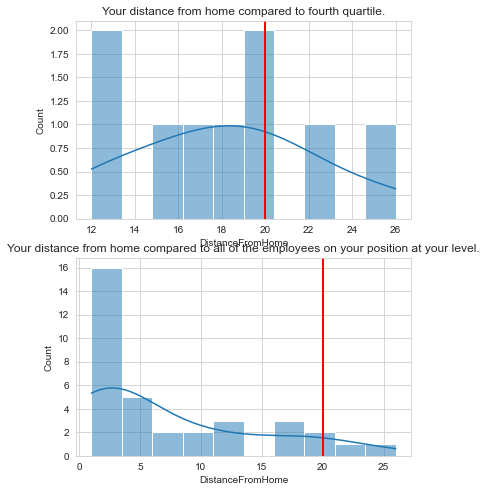

88.57% Female working in company for 4 years has less distance from home, 5.71% of them has higher distance from home than you.


In [37]:
plot_distance(20, 'Female', 4)